In [7]:
#Import Liblaries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [24]:
crimedata = pd.read_csv("crime_data (2).csv")

In [25]:
crimedata.head

<bound method NDFrame.head of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      24

# Data Understanding

In [26]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [27]:
crimedata.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [28]:
crimedata.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [29]:
crimedata.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

# Renaming columns

In [30]:
crime_data = crimedata.rename({"Unnamed: 0":"state"},axis=1)

In [31]:
crime_data

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

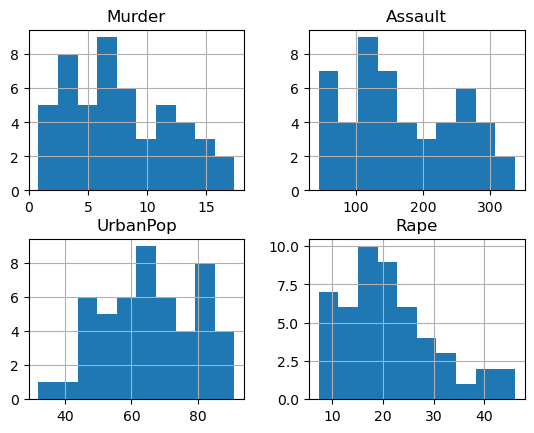

In [32]:
crime_data.hist()

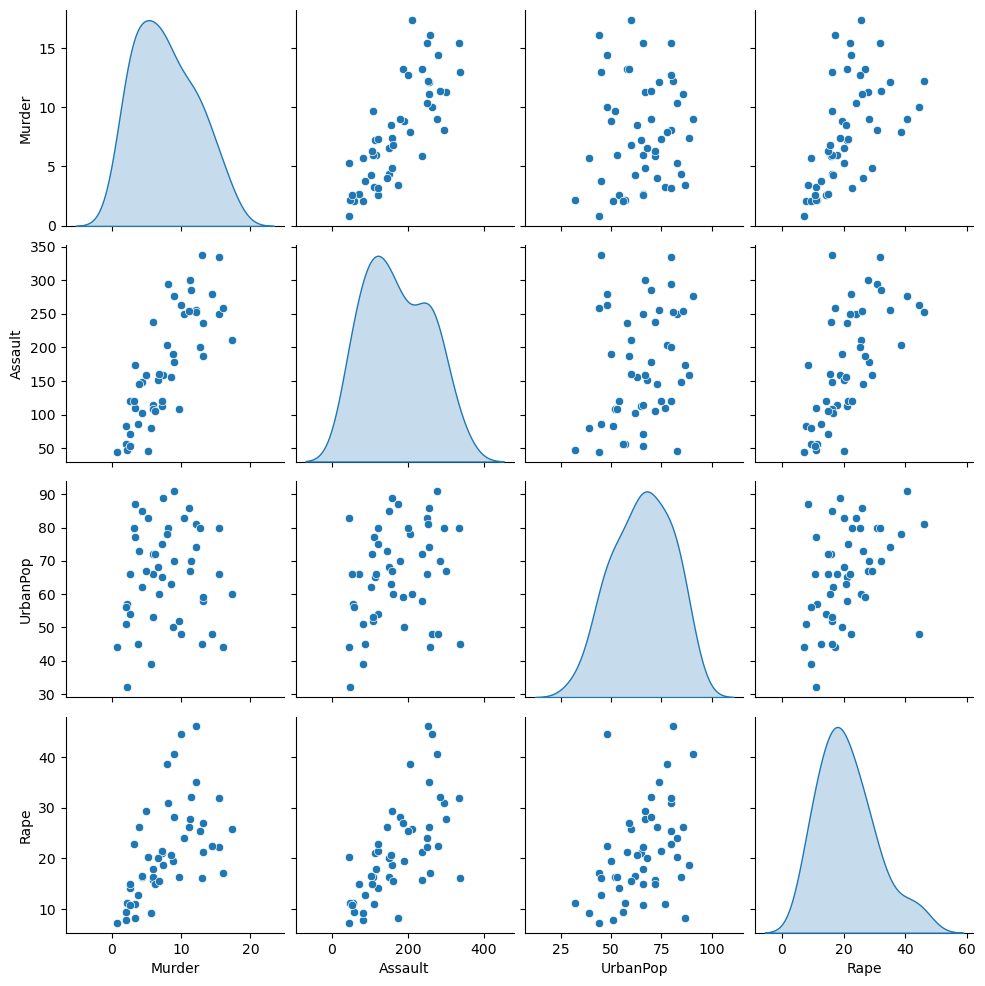

In [35]:
sns.pairplot(crime_data,diag_kind="kde")

In [36]:
crime_data.columns

Index(['state', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

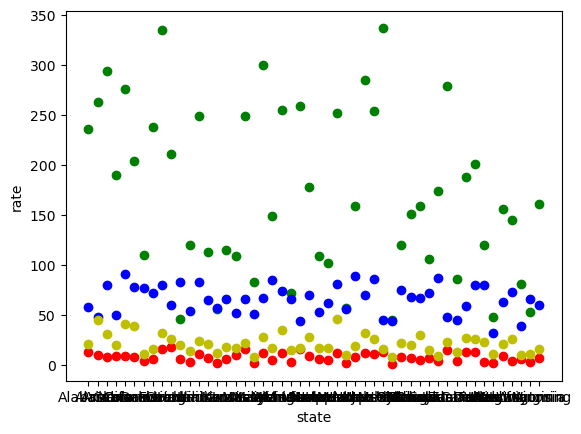

In [38]:
plt.scatter(crime_data.state, crime_data.Murder, color='r')
plt.scatter(crime_data.state, crime_data.Assault, color='g')
plt.scatter(crime_data.state, crime_data.UrbanPop, color='b')
plt.scatter(crime_data.state, crime_data.Rape, color='y')
plt.xlabel('state')
plt.ylabel('rate')
plt.show()

# Data Normalization

In [39]:
def normalf(i):
    x = (i - i.min())/(i.max())
    return(x)

In [42]:
crime_data_normal=normalf(crime_data.iloc[:,1:])

In [43]:
crime_data_normal

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


# certe a dendrogream
#Plotting the dendrogram - eard method

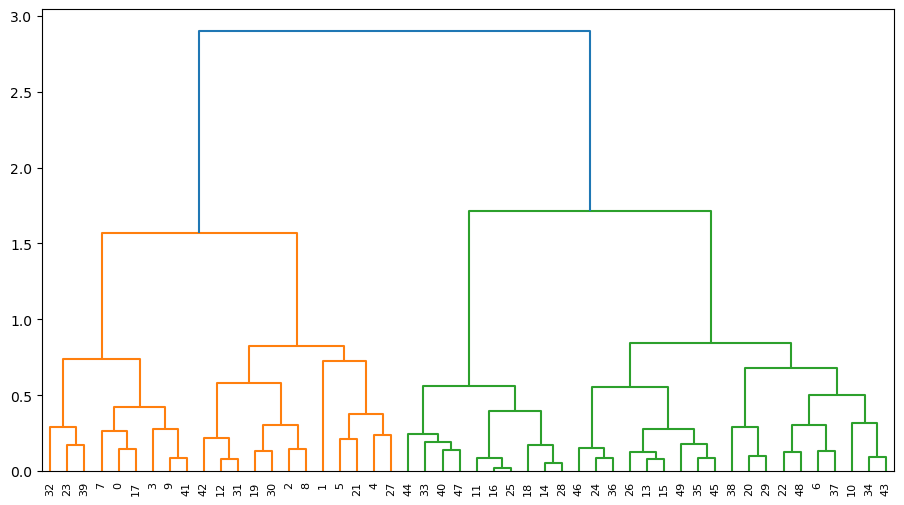

In [46]:
plt.figure(figsize=(11,6))
dendrogram = sch.dendrogram(sch.linkage(crime_data_normal,method="ward"))

# specifying hierarchical clustering

In [47]:
hc = AgglomerativeClustering(n_clusters=3)

In [48]:
hc

AgglomerativeClustering(n_clusters=3)

In [49]:
y_hc = hc.fit_predict(crime_data)

In [50]:
y_hc

array([0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [51]:
# 3 clusters found

In [52]:
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])

In [53]:
crime_data["Hierarchical_clusterid"] =Clusters

In [54]:
crime_data

,Murder,Assault,UrbanPop,Rape,Hierarchical_clusterid
0,0.712644,0.566766,0.285714,0.302174,0
1,0.528736,0.646884,0.175824,0.808696,0
2,0.419540,0.738872,0.527473,0.515217,0
3,0.459770,0.430267,0.197802,0.265217,1
4,0.471264,0.685460,0.648352,0.723913,0
5,0.408046,0.471810,0.505495,0.682609,0
6,0.143678,0.192878,0.494505,0.082609,2
7,0.293103,0.572700,0.439560,0.184783,1
8,0.839080,0.860534,0.527473,0.534783,0
9,0.954023,0.492582,0.307692,0.402174,0


In [55]:
crime_data.groupby("Hierarchical_clusterid").agg(["mean"]).reset_index()

,Hierarchical_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.653161,0.623887,0.400000,0.475326
1,1,0.311359,0.287310,0.428571,0.257161
2,2,0.132626,0.099749,0.241758,0.097324


In [56]:
crime_data["Hierarchical_clusterid"].value_counts()

0    20
1    17
2    13
Name: Hierarchical_clusterid, dtype: int64

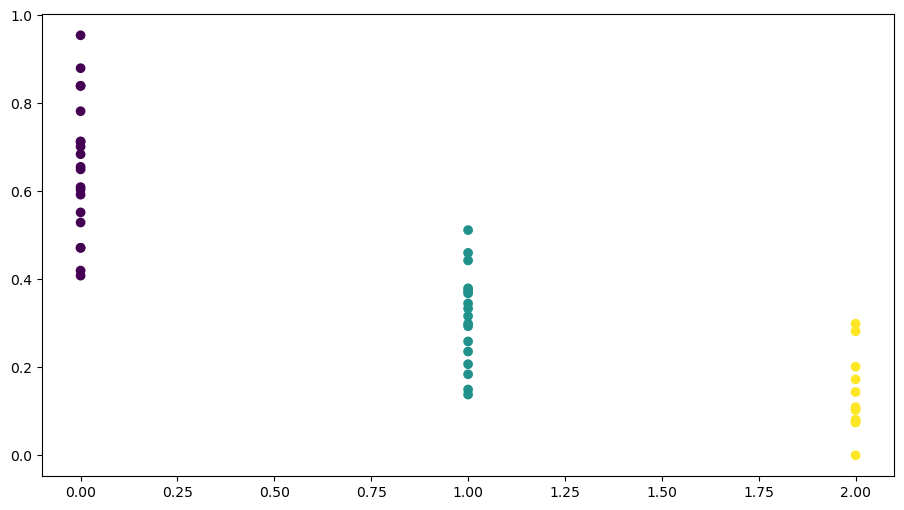

In [60]:
plt.figure(figsize=(11,6))
plt.scatter(crime_data['Hierarchical_clusterid'],crime_data['Murder'], c=hc.labels_)

In [61]:
# 3 clusters is form
